In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
results = pd.read_csv('intermediate outputs/optimization output(100000,[0.1]) - lUDO.csv')

In [4]:
results = results.drop(columns=['Unnamed: 0'])

In [5]:
results.head()

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.4_Dike Investment Costs,A.4_Expected Annual Damage,A.4_Expected Number of Deaths,A.5_Dike Investment Costs,A.5_Expected Annual Damage,A.5_Expected Number of Deaths,Expected Evacuation Costs,Other.Dikes_Expected Annual Damage,Other.Dikes_Total Dike Investment Costs,Other.Dikes_Expected Number of Deaths
0,1,1,0,1,1,0,1,0,1,1,...,6.320800e+06,3.384483e+06,0.001555,0.0,7.899784e+05,0.000694,0.0,8.386708e+05,1.008369e+08,0.001439
1,1,0,0,0,1,1,1,1,1,1,...,0.000000e+00,5.092443e+06,0.002345,0.0,0.000000e+00,0.000000,0.0,0.000000e+00,4.281842e+07,0.000000
2,0,0,1,0,1,1,1,1,1,1,...,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000,0.0,1.340500e+06,3.824512e+07,0.001237
3,0,0,0,0,1,1,1,1,1,1,...,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000e+00,0.000000,0.0,2.082517e+07,0.000000e+00,0.018866
4,1,1,0,0,0,0,0,1,1,1,...,6.320800e+06,1.687002e+06,0.000773,0.0,1.579957e+06,0.001387,0.0,8.386708e+05,6.814199e+07,0.001439


In [13]:
len(results)

37

### Printing some plots and statistics

In [6]:
outcomes = results.columns[31:41] # select the outcomes of the optmization

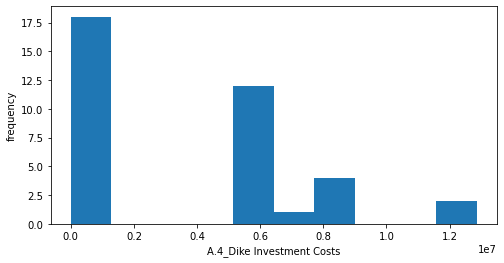

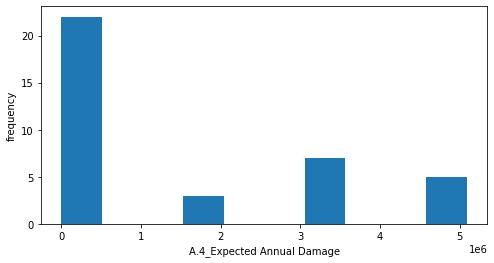

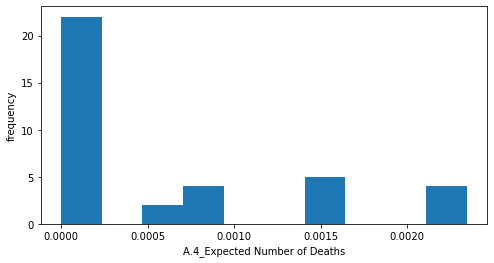

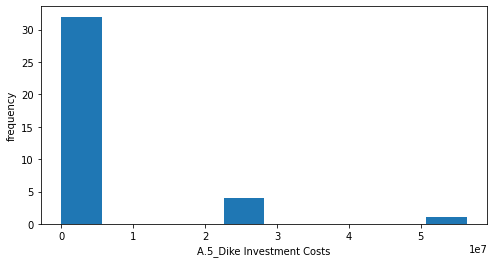

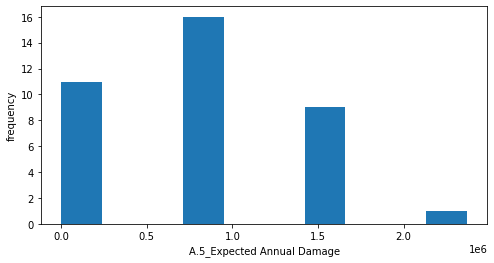

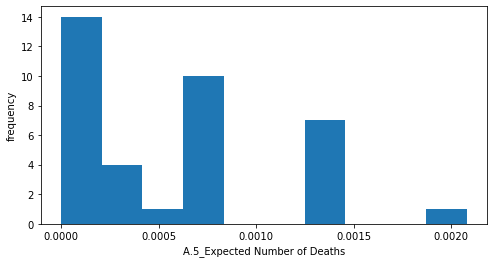

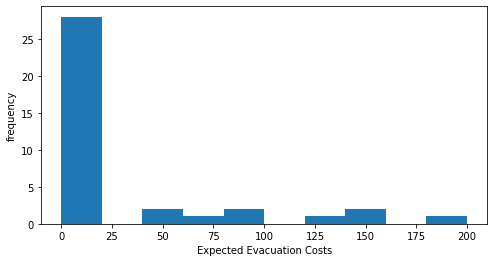

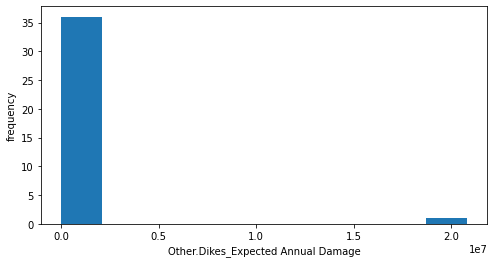

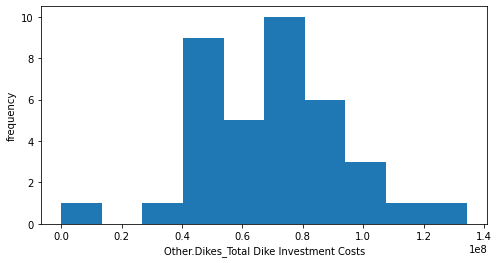

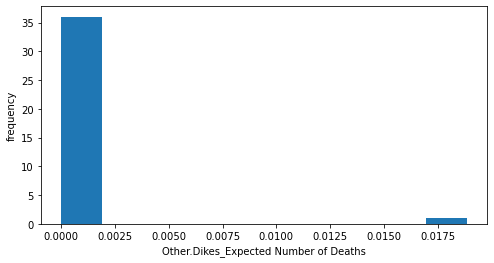

In [9]:
for outcome in outcomes:
    fig, ax = plt.subplots(ncols=1, sharex=True, figsize=(8,4))
    plt.hist(x = results[outcome])
    ax.set_ylabel('frequency')
    ax.set_xlabel(outcome)

In [10]:
for outcome in outcomes:
    print(outcome)
    print(f'max value: {max(results[outcome])}')
    print(f'min value: {min(results[outcome])}')
    print()

A.4_Dike Investment Costs
max value: 12857587.774250695
min value: 0.0

A.4_Expected Annual Damage
max value: 5092443.386663695
min value: 0.0

A.4_Expected Number of Deaths
max value: 0.002345337157982861
min value: 0.0

A.5_Dike Investment Costs
max value: 56425877.74343681
min value: 0.0

A.5_Expected Annual Damage
max value: 2369935.117728584
min value: 0.0

A.5_Expected Number of Deaths
max value: 0.002080519477257459
min value: 0.0

Expected Evacuation Costs
max value: 199.9447897658332
min value: 0.0

Other.Dikes_Expected Annual Damage
max value: 20825165.72234642
min value: 0.0

Other.Dikes_Total Dike Investment Costs
max value: 134365111.51750863
min value: 0.0

Other.Dikes_Expected Number of Deaths
max value: 0.018866251626669217
min value: 0.0



### Selecting policies

In [11]:
deaths = ["A.4_Expected Number of Deaths", "A.5_Expected Number of Deaths", "Other.Dikes_Expected Number of Deaths"]

1. No policies with too many dead

In [12]:
logical = (results[deaths[0]] < 0.12) & (results[deaths[1]] < 0.12) & (results[deaths[2]] < 0.12)
print(f'Policies kept: {np.sum(logical)}')
print(f'% Policies kept: {np.sum(logical)/len(results) * 100}')

Policies kept: 37
% Policies kept: 100.0


Ludo's thought: I think we can proceed with all these solutions because they are not that many anyway (and Doruk's and Aspa's computers can handle whatever we throw at them). We can still say in the report that we checked that all the policies were feasible to our client before continuing with the other steps.

2. Policies with the lowest number of deaths for our dike rings

In [14]:
results['Dike 4 & 5 - Total deaths'] = results["A.4_Expected Number of Deaths"] + results["A.5_Expected Number of Deaths"]

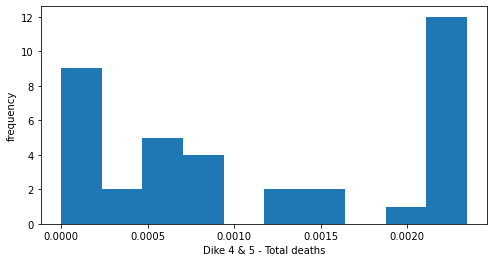

In [15]:
fig, ax = plt.subplots(ncols=1, sharex=True, figsize=(8,4))
plt.hist(x = results['Dike 4 & 5 - Total deaths'])
ax.set_ylabel('frequency')
ax.set_xlabel('Dike 4 & 5 - Total deaths');

In [16]:
for q in [25, 50, 75]:
    logical = results['Dike 4 & 5 - Total deaths'] < np.percentile(results['Dike 4 & 5 - Total deaths'], q)
    print(f'Policies kept: {np.sum(logical)}')
    print(f'% Policies kept: {np.sum(logical)/len(results) * 100}')
    print()

Policies kept: 9
% Policies kept: 24.324324324324326

Policies kept: 17
% Policies kept: 45.94594594594595

Policies kept: 27
% Policies kept: 72.97297297297297



Last year's group had 59 solutions to begin with, with their selection they kept 31 solutions.

### Creating ranges for the hypervolume convergence thing

Basic idea for the range: since 0 is the minimum value for each of the outcomes, then the range will be from 0 to the max value of each category (dike costs, damages, deaths) increased by 10%.

In [22]:
def compute_max(columns, results, title):
    all_max = []
    for column in columns:
        print(column)
        print(f'max value: {max(results[column])}' + '\n')
        all_max.append(max(results[column]))
        
    print('max ' + title + ": " + f'{max(all_max)}')
    return max(all_max)
    
def print_range(max_value):
    print(f'range: (0, {max_value * 1.1})')

In [23]:
# costs
costs = ["A.4_Dike Investment Costs", "A.5_Dike Investment Costs", "Other.Dikes_Total Dike Investment Costs"]
max_cost = compute_max(costs, results, 'dike costs')
print()
print_range(max_cost)

A.4_Dike Investment Costs
max value: 84322880.59216172

A.5_Dike Investment Costs
max value: 198258101.22035733

Other.Dikes_Total Dike Investment Costs
max value: 669109405.7671884

max dike costs: 669109405.7671884

range: (0, 736020346.3439074)


In [24]:
# damage
damages = ['A.4_Expected Annual Damage', "A.5_Expected Annual Damage", "Other.Dikes_Expected Annual Damage"]
max_dam = compute_max(damages, results, 'total damages')
print()
print_range(max_dam)

A.4_Expected Annual Damage
max value: 17564640.619609352

A.5_Expected Annual Damage
max value: 140152950.45699227

Other.Dikes_Expected Annual Damage
max value: 357140504.99629617

max total damages: 357140504.99629617

range: (0, 392854555.49592584)


In [25]:
max_death = compute_max(deaths, results, 'deaths')
print()
print_range(max_death)

A.4_Expected Number of Deaths
max value: 0.008946397468884601

A.5_Expected Number of Deaths
max value: 0.12513343926988654

Other.Dikes_Expected Number of Deaths
max value: 0.31642753318725864

max deaths: 0.31642753318725864

range: (0, 0.34807028650598454)


In [26]:
# evacuation costs
print_range(max(results["Expected Evacuation Costs"]))

range: (0, 11440.731541134763)
